###Week 1: Introduction to Machine Learning
Objective: Understand the basics of machine learning and Python/R etc

####Experiment 1:

*   Write a Python program to demonstrate data preprocessing steps:
handling missing values, encoding categorical data, and featurescaling
*   Load a sample dataset using pandas (e.g., Iris or a custom dataset)
*   Plot the distribution of a feature using matplotlib.pyplot.hist().
*   Create scatter plots to understand relationships between features using seaborn.scatterplot().
*   Use a correlation heatmap to find the relationship between multiple features with seaborn.heatmap().

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset into a Pandas DataFrame
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [ ]:
# Add some missing values for demonstration
data.loc[5:10, 'sepal width (cm)'] = np.nan

In [ ]:
# Display first few rows of the dataset
print("Initial Data:")
print(data.head())

Initial Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
# Step 1: Handle Missing Values
data['sepal width (cm)'].fillna(data['sepal width (cm)'].mean(), inplace=True)

<ipython-input-5-244b35f91875>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sepal width (cm)'].fillna(data['sepal width (cm)'].mean(), inplace=True)


In [ ]:
# Step 2: Encode Categorical Data
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

In [ ]:
# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, :-1])
data.iloc[:, :-1] = scaled_features

In [ ]:
# Display processed data
print("\nProcessed Data:")
print(data.head())


Processed Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.079168          -1.340227         -1.315444   
1          -1.143017         -0.101684          -1.340227         -1.315444   
2          -1.385353          0.370656          -1.397064         -1.315444   
3          -1.506521          0.134486          -1.283389         -1.315444   
4          -1.021849          1.315338          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


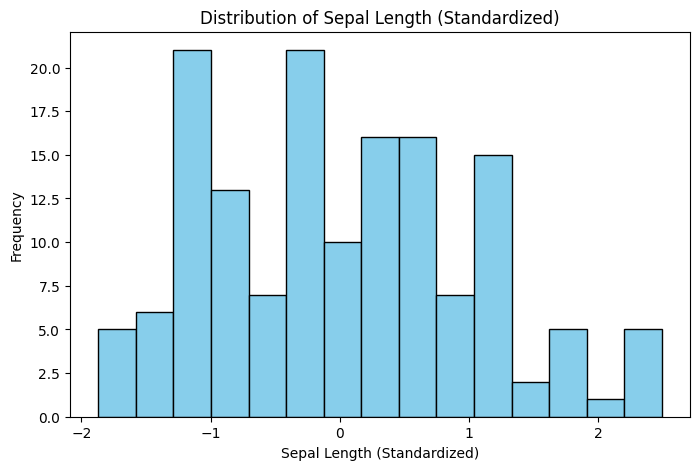

In [ ]:
# Step 4: Plot the distribution of a feature
plt.figure(figsize=(8, 5))
plt.hist(data['sepal length (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length (Standardized)')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Frequency')
plt.show()

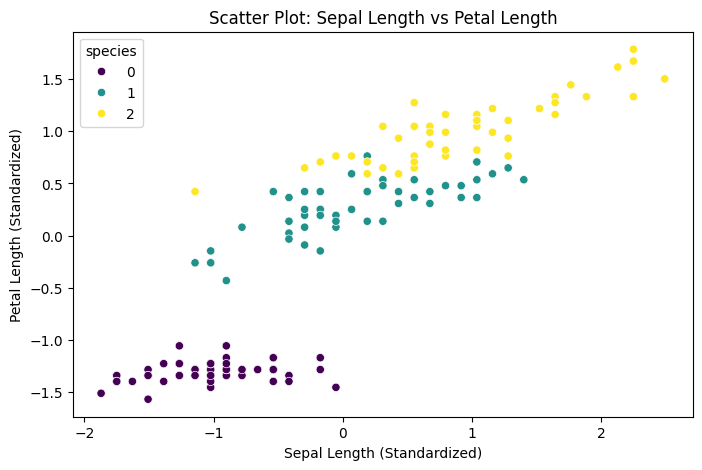

In [ ]:
# Step 5: Create scatter plots to understand relationships
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=data, palette='viridis')
plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Petal Length (Standardized)')
plt.show()

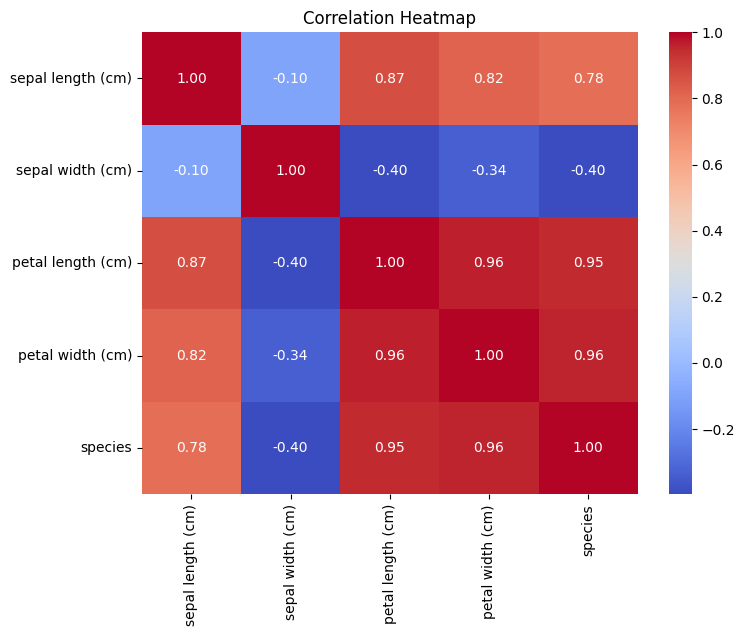

In [ ]:
# Step 6: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()